In [1]:
!pip3 install hyperas
!pip3 install hyperopt

In [2]:
# import the libraries
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
import numpy as np
from keras.datasets import cifar10

In [3]:
# function to import the cifar10 data
def data():
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  
  num_classes = 10
  
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  
  # normalization
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  
  return x_train, y_train, x_test, y_test

In [4]:
# function to create our model
def create_model(x_train, y_train, x_test, y_test):
    
    from keras.layers import Layer
    from keras import backend as K

    class Swish(Layer):
        def __init__(self, beta, **kwargs):
            super(Swish, self).__init__(**kwargs)
            self.beta = K.cast_to_floatx(beta)

        def call(self, inputs):
            return K.sigmoid(self.beta * inputs) * inputs

        def get_config(self):
            config = {'beta': float(self.beta)}
            base_config = super(Swish, self).get_config()
            return dict(list(base_config.items()) + list(config.items()))

        def compute_output_shape(self, input_shape):
            return input_shape
    
    # hyperparameters to optimize
    layer1 = {{choice([16, 32, 64])}}
    kernel1 = {{choice([3, 5])}}
    maxpooling1 = {{choice([True, False])}}
    layer2 = {{choice([32, 64, 128])}}
    kernel2 = {{choice([3, 5])}}
    maxpooling2 = {{choice([True, False])}}
    layer3 = {{choice([512, 1024, 2048])}}
    act = {{choice(['relu', 'leakyrelu', 'swish'])}}
    optim = {{choice(['rmsprop', 'adam', 'sgd'])}}
    n_batch = {{choice([64, 128, 256])}}
    
    if act == 'relu':
        activation = keras.layers.ReLU()
    elif act == 'leakyrelu':
        activation = keras.layers.LeakyReLU()
    elif act == 'swish':
        activation = Swish(beta=0.3)
    
    # build the model
    model = Sequential()
    model.add(Conv2D(layer1, (kernel1, kernel1), activation=activation, input_shape=(32, 32, 3)))
    if (maxpooling1):
        model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(layer2, (kernel2, kernel2), activation=activation))
    if (maxpooling2):
        model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(layer3, activation=activation))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=optim,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_accuracy', patience=3, verbose=0)]
    
    # start learning
    result = model.fit(x_train, y_train,
              batch_size=n_batch,
              epochs=100,
              verbose=2,
              validation_data=(x_test, y_test),
              callbacks=callbacks,
              shuffle=True)

    best_val_acc = np.amax(result.history['val_accuracy'])
    
    # save the result
    with open('hyperas-cifar10-log.csv', 'a') as csv_file:
      csv_file.write(str(layer1) + ';')
      csv_file.write(str(kernel1) + ';')
      csv_file.write(str(maxpooling1) + ';')
      csv_file.write(str(layer2) + ';')
      csv_file.write(str(kernel2) + ';')
      csv_file.write(str(maxpooling2) + ';')
      csv_file.write(str(layer3) + ';')
      csv_file.write(str(act) + ';')
      csv_file.write(str(optim) + ';')
      csv_file.write(str(n_batch) + ';')
      csv_file.write(str(best_val_acc) + '\n')

    return {'loss': -best_val_acc, 'status': STATUS_OK, 'model': model}

In [5]:
# create the csv output file
with open('hyperas-cifar10-log.csv', 'w') as csv_file:
  csv_file.write('layer1' + ';')
  csv_file.write('kernel1' + ';')
  csv_file.write('maxpooling1' + ';')
  csv_file.write('layer2' + ';')
  csv_file.write('kernel2' + ';')
  csv_file.write('maxpooling2' + ';')
  csv_file.write('layer3' + ';')
  csv_file.write('act' + ';')
  csv_file.write('optim' + ';')
  csv_file.write('n_batch' + ';')
  csv_file.write('best_val_acc' + '\n')

In [6]:
# import the libraries for hyperparameter optimization
import hyperas
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

In [7]:
# run the optimization
best_run, best_model = optim.minimize(model=create_model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals=40,
                                          notebook_name='5_kis_hf',
                                          trials=Trials())

>>> Imports:
#coding=utf-8

try:
    import keras
except:
    pass

try:
    from keras.datasets import fashion_mnist
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
except:
    pass

try:
    from keras.callbacks import EarlyStopping
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    from keras.datasets import cifar10
except:
    pass

try:
    from keras.layers import Layer
except:
    pass

try:
    from keras import backend as K
except:
    pass

>>> Hyperas search space:

def get_space():
    return {
        'layer1': hp.choice('layer1', [16, 32, 64]),
        'kernel1': hp.choice('kernel1', [3, 5]),
        'maxpooling1': hp.choice('maxpooling1', [True, False]),
        'layer2': hp.choice('layer2', [32, 64, 128]),
        'kernel1_1': hp.choice('kernel1_1', [3, 5]),
        'maxpooling1_1': hp.choice('maxpooling1_1', [True, False]),


In [18]:
# print the parameters of the 5 best model
import pandas
hyperas_log = pandas.read_csv('hyperas-cifar10-log.csv', delimiter=';')
hyperas_best5 = hyperas_log.sort_values(by=['best_val_acc'], ascending=False).head(n=5)
hyperas_best5

,layer1,kernel1,maxpooling1,layer2,kernel2,maxpooling2,layer3,act,optim,n_batch,best_val_acc
38,32,3,False,128,5,True,2048,relu,rmsprop,256,0.7208
34,16,3,False,128,5,True,2048,relu,rmsprop,256,0.7201
33,64,3,True,128,5,True,2048,relu,rmsprop,256,0.7193
13,16,3,False,128,5,True,2048,relu,rmsprop,128,0.7174
10,64,5,True,128,5,True,1024,relu,adam,256,0.7172


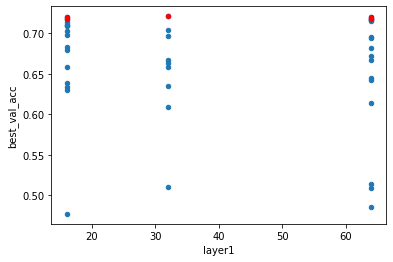

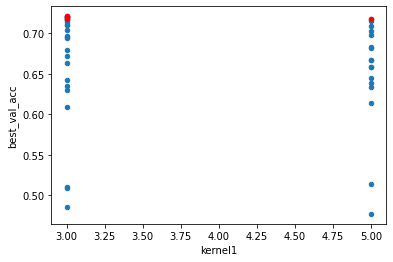

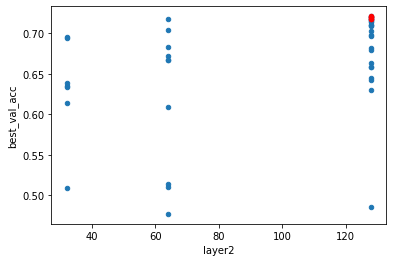

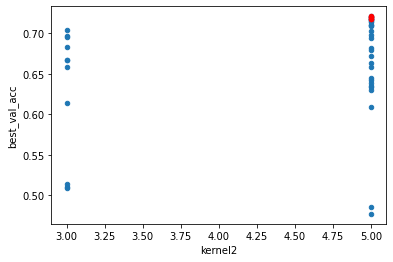

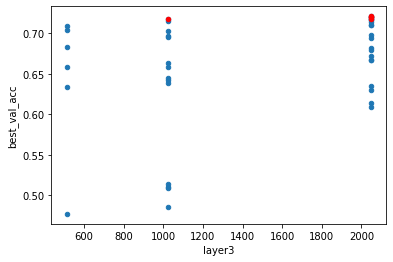

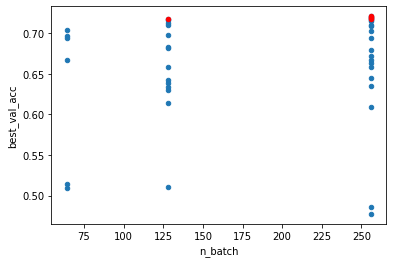

In [19]:
# visualize the results
import matplotlib.pyplot as plt
for hyperparam in ['layer1', 'kernel1', 'layer2', 'kernel2', 'layer3', 'n_batch']:
  ax1 = hyperas_log.plot(kind='scatter', x=hyperparam, y='best_val_acc')
  hyperas_best5.plot(kind='scatter', x=hyperparam, y='best_val_acc', color='red', ax=ax1)

(3.5, -0.5)

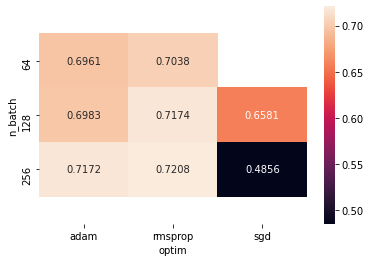

In [20]:
# heatmap for the optimizer and batch size
import seaborn as sns
max_val_acc = hyperas_log.groupby(['n_batch', 'optim']).max()
max_val_acc = max_val_acc.unstack()[['best_val_acc']]
sns.heatmap(max_val_acc.best_val_acc, annot=True, fmt='.4g');
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)